Source: https://github.com/chriswi93/LDA and https://medium.com/@datastories/parameter-estimation-for-latent-dirichlet-allocation-explained-with-collapsed-gibbs-sampling-in-1d2ec78b64c

In [10]:
import pandas as pd
from src import LDA
from src.corpus import Corpus

## Data

In [5]:
df = pd.read_csv("data/amazon_reviews.txt", sep="\t")

In [6]:
df.shape

(21000, 9)

In [8]:
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [17]:
texts = df["REVIEW_TEXT"].head(1000).values.tolist()

## Make corpus

In [18]:
corpus_train = Corpus(texts, max_features=10_000)

## Train

In [19]:
lda = LDA(corpus_train, K=5, alpha="asymmetric", beta=0.01, samples=50, burnin=150, interval=5, eval_every=1)

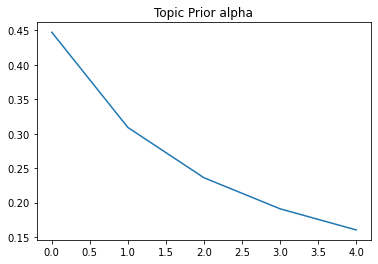

In [20]:
lda.plot_topic_prior_alpha()

In [21]:
%time lda.fit()

burnin iteration 0 perplexity 11630.6 likelihood -237957.2
burnin iteration 1 perplexity 8796.1 likelihood -230857.1
burnin iteration 2 perplexity 7955.6 likelihood -228303.9
burnin iteration 3 perplexity 7437.8 likelihood -226593.3
burnin iteration 4 perplexity 7158.8 likelihood -225621.5
burnin iteration 5 perplexity 6788.3 likelihood -224270.6
burnin iteration 6 perplexity 6467.7 likelihood -223040.8
burnin iteration 7 perplexity 6222.4 likelihood -222058.3
burnin iteration 8 perplexity 6076.5 likelihood -221455.1
burnin iteration 9 perplexity 5921.3 likelihood -220797.3
burnin iteration 10 perplexity 5713.8 likelihood -219890.7
burnin iteration 11 perplexity 5587.9 likelihood -219324.2
burnin iteration 12 perplexity 5376.6 likelihood -218344.6
burnin iteration 13 perplexity 5238.8 likelihood -217684.5
burnin iteration 14 perplexity 5104.0 likelihood -217021.8
burnin iteration 15 perplexity 4981.9 likelihood -216406.4
burnin iteration 16 perplexity 4880.0 likelihood -215881.1
burnin

burnin iteration 139 perplexity 3591.2 likelihood -208085.8
burnin iteration 140 perplexity 3534.9 likelihood -207684.1
burnin iteration 141 perplexity 3551.2 likelihood -207801.2
burnin iteration 142 perplexity 3573.3 likelihood -207958.9
burnin iteration 143 perplexity 3597.4 likelihood -208129.9
burnin iteration 144 perplexity 3576.2 likelihood -207979.9
burnin iteration 145 perplexity 3580.7 likelihood -208011.4
burnin iteration 146 perplexity 3609.0 likelihood -208211.6
burnin iteration 147 perplexity 3606.0 likelihood -208190.4
burnin iteration 148 perplexity 3624.9 likelihood -208323.3
burnin iteration 149 perplexity 3585.9 likelihood -208048.3
sampling iteration 150 perplexity 3577.6 likelihood -207989.5
sampling iteration 151 perplexity 3562.0 likelihood -207878.6
sampling iteration 152 perplexity 3555.7 likelihood -207833.9
sampling iteration 153 perplexity 3587.6 likelihood -208060.4
sampling iteration 154 perplexity 3574.6 likelihood -207968.7
sampling iteration 155 perplex

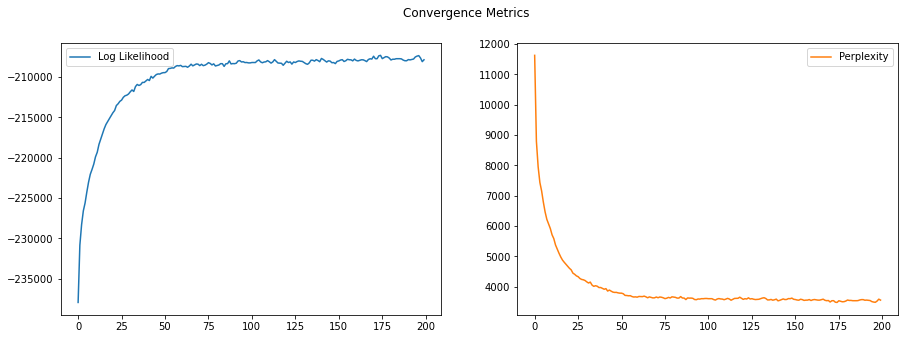

In [22]:
lda.plot_metrics()

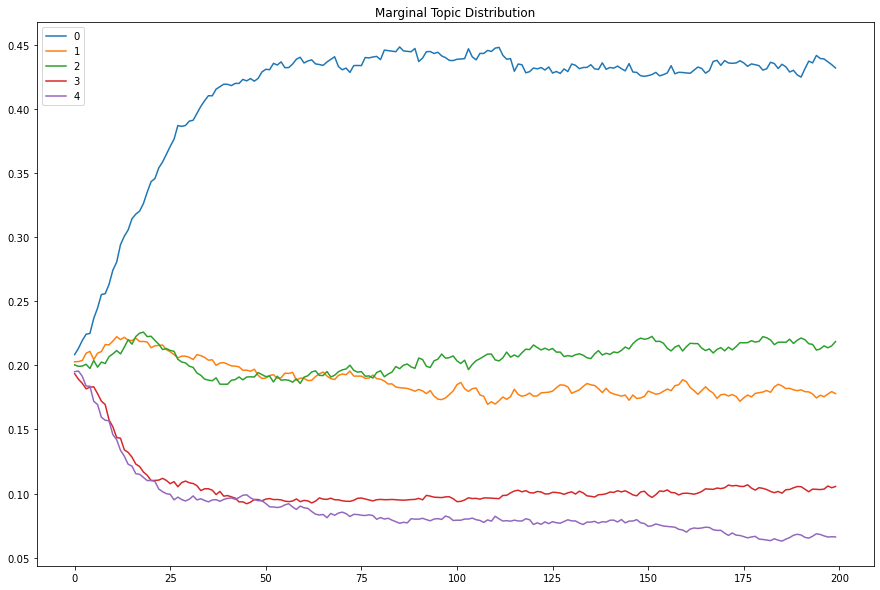

In [23]:
lda.plot_marginal_topic_dist()

In [24]:
lda.print_topics()

p(w|t)	word

Topic #1
0.018	great
0.016	good
0.013	like
0.011	really
0.011	use
0.010	quality
0.009	just
0.008	price
0.008	product
0.008	time

Topic #2
0.011	like
0.011	skin
0.011	use
0.010	hair
0.010	really
0.009	great
0.008	just
0.007	using
0.006	used
0.006	oil

Topic #3
0.035	br
0.017	product
0.009	weight
0.009	did
0.007	reviews
0.007	work
0.007	just
0.006	months
0.005	time
0.005	help

Topic #4
0.069	br
0.017	34
0.014	book
0.011	government
0.004	people
0.003	love
0.003	citizens
0.003	emily
0.003	brothers
0.003	books

Topic #5
0.015	br
0.008	book
0.007	cards
0.005	anxiety
0.005	supplement
0.004	pain
0.004	asin
0.004	biotin
0.004	ender
0.003	help

